In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset in  jupyter notebook
df = pd.read_excel("C:\\Users\\prajw\\OneDrive\\Desktop\\Rainfall\\sydney_rain prediction.xlsx")
#printing first 10 rows of dataset
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
5,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes
6,2008-02-07,Sydney,18.6,26.3,6.2,5.2,5.2,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes
7,2008-02-08,Sydney,17.2,22.3,27.6,5.8,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,Yes
8,2008-02-09,Sydney,16.4,20.8,12.6,4.8,3.0,92.0,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,Yes
9,2008-02-10,Sydney,14.6,24.2,8.8,4.4,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,Yes,No


In [15]:
# discarding the unrelevent filed such as date , 
#Cloud3pm and Temp9am containg more than 500 null values

In [17]:
columns_to_drop = ['Date','Cloud9am','Cloud3pm']
#discarding the columns from dataframe
df.drop(columns=columns_to_drop, inplace=True)

KeyError: "['Date', 'Cloud9am', 'Cloud3pm'] not found in axis"

In [18]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,Yes,Yes
1,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,Yes,Yes
2,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,Yes,Yes
3,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,Yes,Yes
4,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,Yes,Yes


In [19]:
df.shape # counting the rows and columns

(3337, 14)

In [20]:
# performing EDD
df.describe() 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,36.500000,44.700000


In [21]:
df.isnull().sum()

Location         0
MinTemp          3
MaxTemp          2
Rainfall         6
Evaporation     51
Sunshine        16
Humidity9am     14
Humidity3pm     13
Pressure9am     20
Pressure3pm     19
Temp9am          4
Temp3pm          4
RainToday        6
RainTomorrow     0
dtype: int64

In [ ]:
#plotting heatmap to see null values in visualize manners

<Axes: >

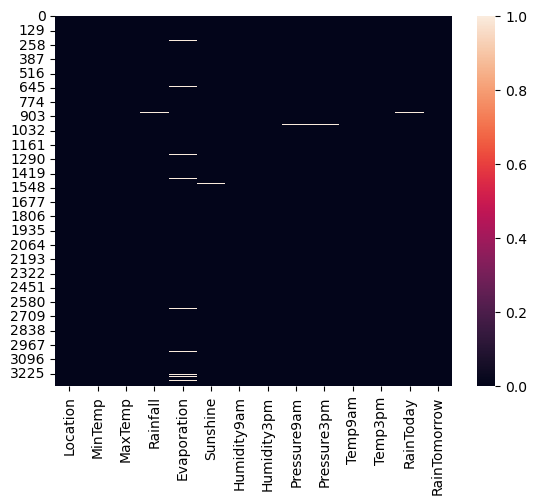

In [22]:
sns.heatmap(df.isnull())

In [ ]:
#Dealing with the null values

In [23]:
print(df.dtypes)

Location         object
MinTemp         float64
MaxTemp         float64
Rainfall        float64
Evaporation     float64
Sunshine        float64
Humidity9am     float64
Humidity3pm     float64
Pressure9am     float64
Pressure3pm     float64
Temp9am         float64
Temp3pm         float64
RainToday        object
RainTomorrow     object
dtype: object


In [24]:
# Fill null values with mean and mode using a for loop
for column in df.columns:
    if df[column].dtype == 'object':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    else:
        # For numeric type columns, fill with mean
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

print(df)

     Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0      Sydney     19.5     22.4      15.6     6.200000       0.0         92.0   
1      Sydney     19.5     25.6       6.0     3.400000       2.7         83.0   
2      Sydney     21.6     24.5       6.6     2.400000       0.1         88.0   
3      Sydney     20.2     22.8      18.8     2.200000       0.0         83.0   
4      Sydney     19.7     25.7      77.4     5.187432       0.0         88.0   
...       ...      ...      ...       ...          ...       ...          ...   
3332   Sydney      8.6     19.6       0.0     2.000000       7.8         73.0   
3333   Sydney      9.3     19.2       0.0     2.000000       9.2         78.0   
3334   Sydney      9.4     17.7       0.0     2.400000       2.7         85.0   
3335   Sydney     10.1     19.3       0.0     1.400000       9.3         56.0   
3336   Sydney      7.6     19.3       0.0     3.400000       9.4         73.0   

      Humidity3pm  Pressure

In [25]:
df.isnull().sum()


Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
#performing label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [27]:
for column in df.columns:
    # Check if the column is of object type 
    if df[column].dtype == 'object':
        # Fit label encoder and transform the column
        df[column] = label_encoder.fit_transform(df[column])

print(df)

      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            0     19.5     22.4      15.6     6.200000       0.0   
1            0     19.5     25.6       6.0     3.400000       2.7   
2            0     21.6     24.5       6.6     2.400000       0.1   
3            0     20.2     22.8      18.8     2.200000       0.0   
4            0     19.7     25.7      77.4     5.187432       0.0   
...        ...      ...      ...       ...          ...       ...   
3332         0      8.6     19.6       0.0     2.000000       7.8   
3333         0      9.3     19.2       0.0     2.000000       9.2   
3334         0      9.4     17.7       0.0     2.400000       2.7   
3335         0     10.1     19.3       0.0     1.400000       9.3   
3336         0      7.6     19.3       0.0     3.400000       9.4   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0            92.0         84.0       1017.6       1017.4     20.7     20.9   
1            83

In [ ]:
#checking for outliers using boxplot

<Axes: >

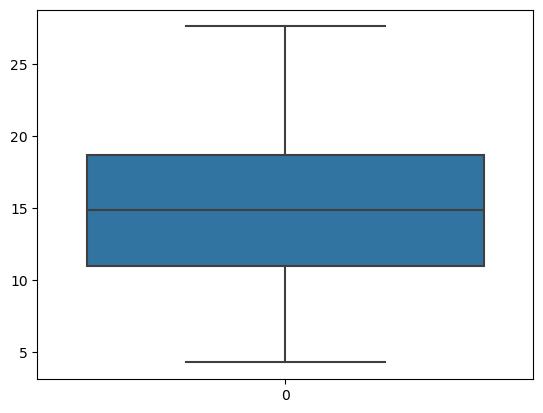

In [28]:
sns.boxplot(df["MinTemp"])

<Axes: >

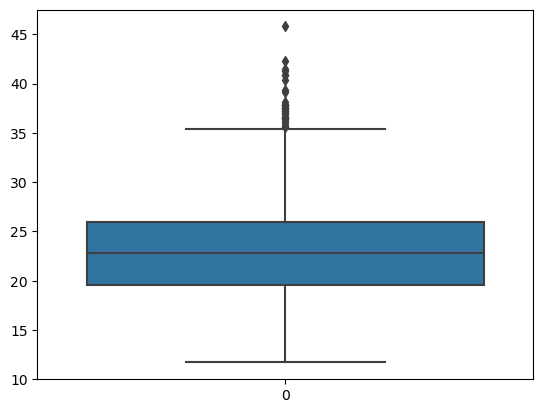

In [29]:
sns.boxplot(df["MaxTemp"])

<Axes: >

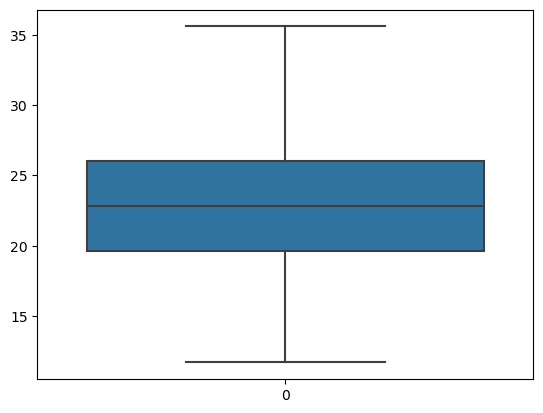

In [30]:
# removing an outliers

q1 = df['MaxTemp'].quantile(0.25)
q3 = df['MaxTemp'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['MaxTemp'] > upper_limit]
df.loc[df['MaxTemp'] < lower_limit]

df.loc[df['MaxTemp']> upper_limit ,'MaxTemp']  = upper_limit

df.loc[df['MaxTemp']< lower_limit ,'MaxTemp']  = lower_limit

#again ploting boxplot

sns.boxplot(df["MaxTemp"])

<Axes: >

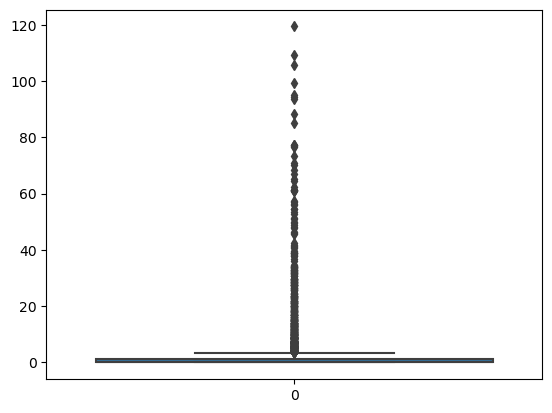

In [31]:
sns.boxplot(df["Rainfall"])

<Axes: >

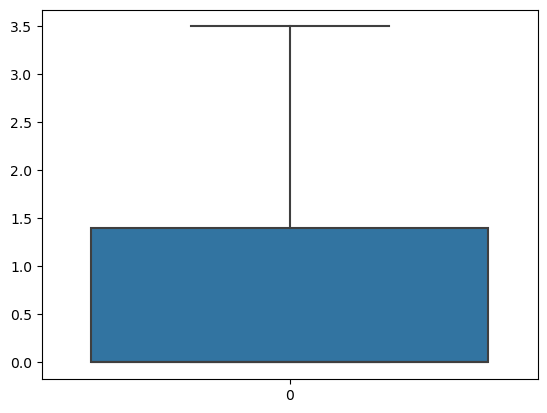

In [32]:
q1 = df['Rainfall'].quantile(0.25)
q3 = df['Rainfall'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Rainfall'] > upper_limit]
df.loc[df['Rainfall'] < lower_limit]

df.loc[df['Rainfall']> upper_limit ,'Rainfall']  = upper_limit

df.loc[df['Rainfall']< lower_limit ,'Rainfall']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Rainfall"])

<Axes: >

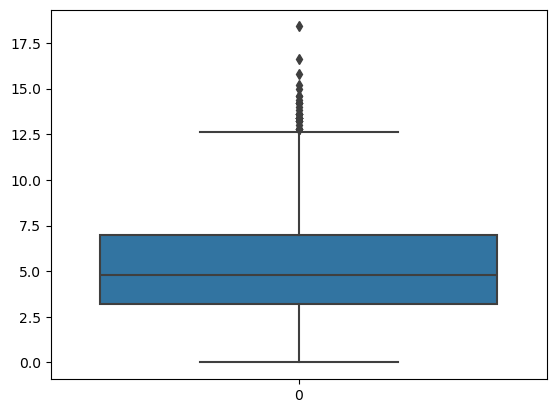

In [33]:
sns.boxplot(df["Evaporation"])

<Axes: >

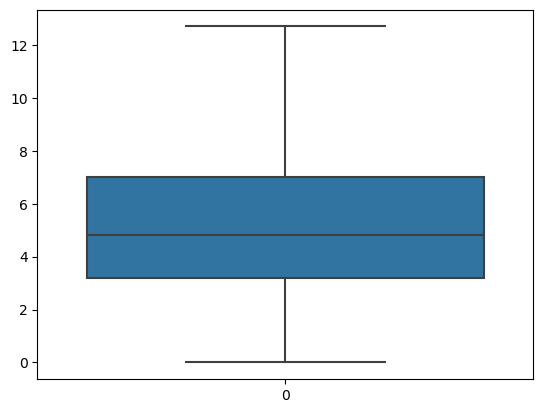

In [34]:
q1 = df['Evaporation'].quantile(0.25)
q3 = df['Evaporation'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Evaporation'] > upper_limit]
df.loc[df['Evaporation'] < lower_limit]

df.loc[df['Evaporation']> upper_limit ,'Evaporation']  = upper_limit

df.loc[df['Evaporation']< lower_limit ,'Evaporation']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Evaporation"])

<Axes: >

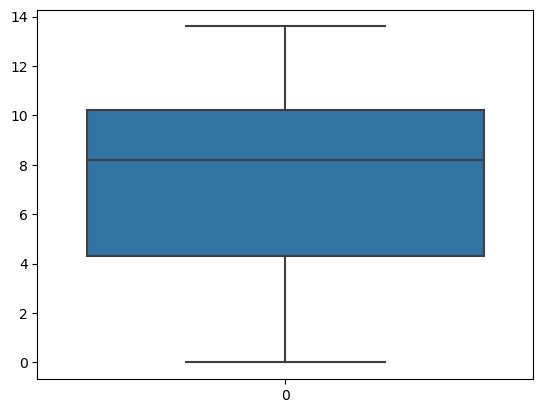

In [36]:
sns.boxplot(df["Sunshine"])

<Axes: >

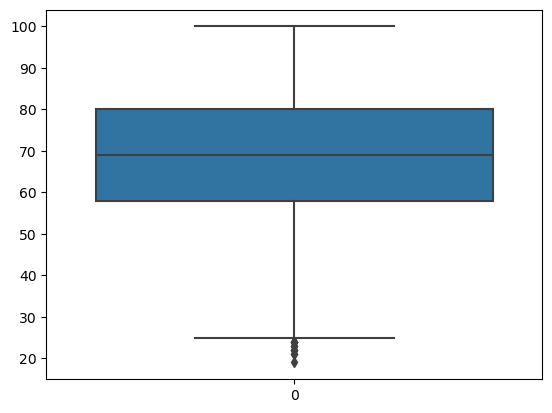

In [37]:
sns.boxplot(df["Humidity9am"])

<Axes: >

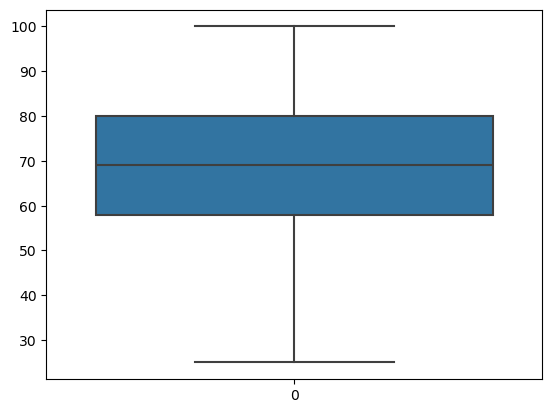

In [38]:
q1 = df['Humidity9am'].quantile(0.25)
q3 = df['Humidity9am'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Humidity9am'] > upper_limit]
df.loc[df['Humidity9am'] < lower_limit]

df.loc[df['Humidity9am']> upper_limit ,'Humidity9am']  = upper_limit

df.loc[df['Humidity9am']< lower_limit ,'Humidity9am']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Humidity9am"])

<Axes: >

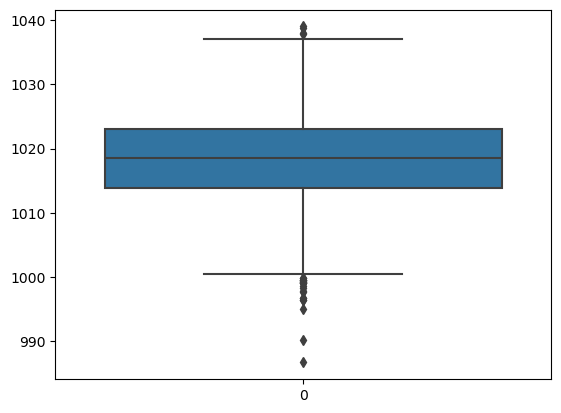

In [39]:
sns.boxplot(df["Pressure9am"])

<Axes: >

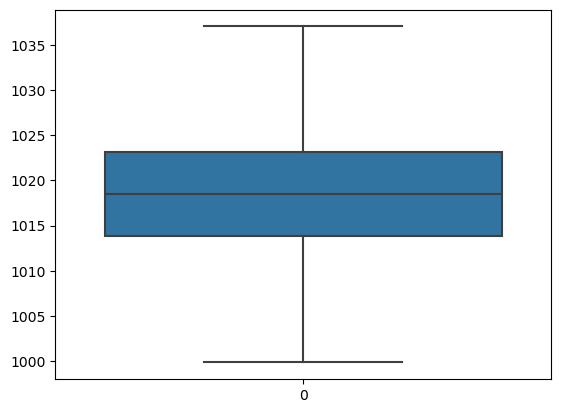

In [40]:
q1 = df['Pressure9am'].quantile(0.25)
q3 = df['Pressure9am'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Pressure9am'] > upper_limit]
df.loc[df['Pressure9am'] < lower_limit]

df.loc[df['Pressure9am']> upper_limit ,'Pressure9am']  = upper_limit

df.loc[df['Pressure9am']< lower_limit ,'Pressure9am']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Pressure9am"])

<Axes: >

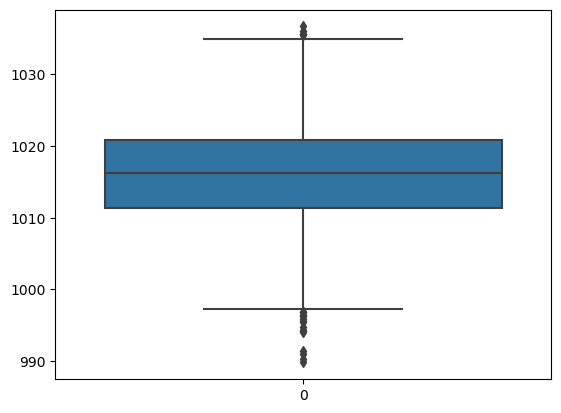

In [41]:
sns.boxplot(df["Pressure3pm"])

<Axes: >

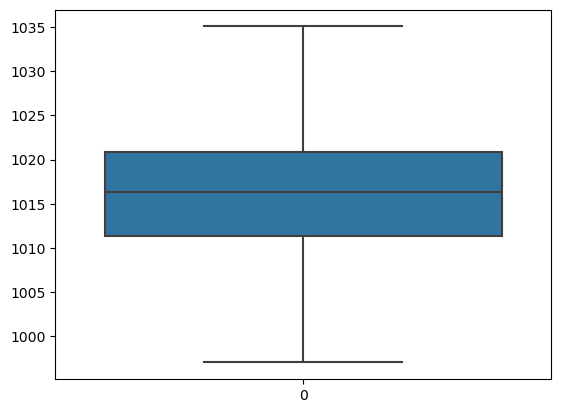

In [42]:
q1 = df['Pressure3pm'].quantile(0.25)
q3 = df['Pressure3pm'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Pressure3pm'] > upper_limit]
df.loc[df['Pressure3pm'] < lower_limit]

df.loc[df['Pressure3pm']> upper_limit ,'Pressure3pm']  = upper_limit

df.loc[df['Pressure3pm']< lower_limit ,'Pressure3pm']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Pressure3pm"])

<Axes: >

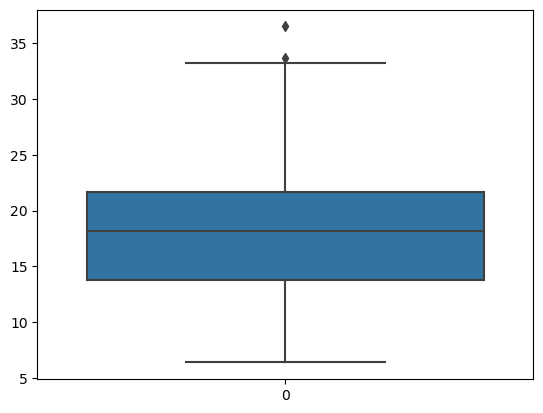

In [43]:
sns.boxplot(df["Temp9am"])

<Axes: >

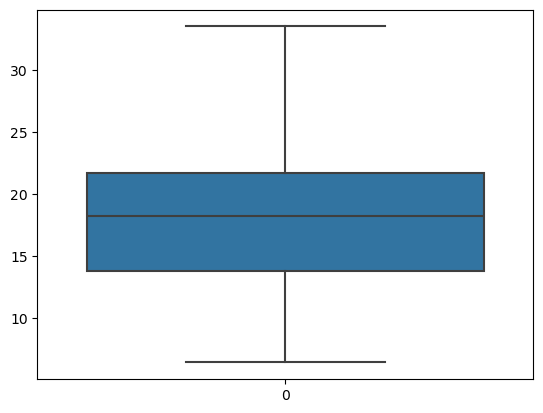

In [44]:
q1 = df['Temp9am'].quantile(0.25)
q3 = df['Temp9am'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Temp9am'] > upper_limit]
df.loc[df['Temp9am'] < lower_limit]

df.loc[df['Temp9am']> upper_limit ,'Temp9am']  = upper_limit
df.loc[df['Temp9am']< lower_limit ,'Temp9am']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Temp9am"])

<Axes: >

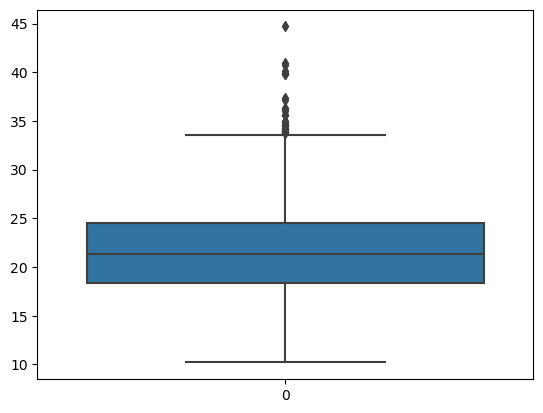

In [45]:
sns.boxplot(df["Temp3pm"])

<Axes: >

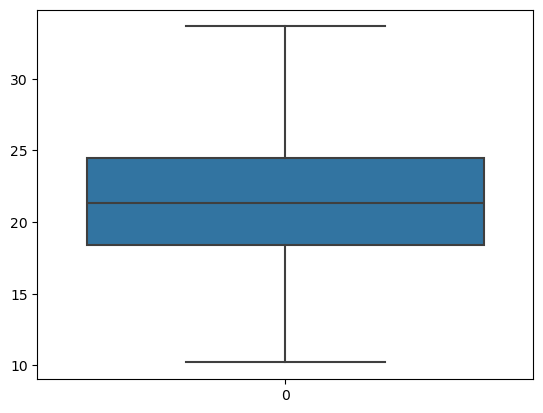

In [46]:
q1 = df['Temp3pm'].quantile(0.25)
q3 = df['Temp3pm'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Temp3pm'] > upper_limit]
df.loc[df['Temp3pm'] < lower_limit]

df.loc[df['Temp3pm']> upper_limit ,'Temp3pm']  = upper_limit
df.loc[df['Temp3pm']< lower_limit ,'Temp3pm']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Temp3pm"])

<Axes: >

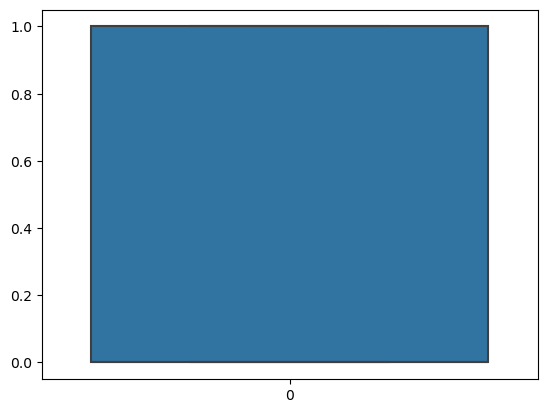

In [47]:
sns.boxplot(df["RainToday"])

<Axes: >

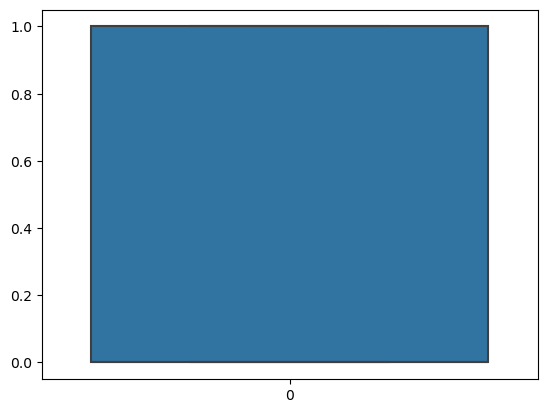

In [48]:
sns.boxplot(df["RainTomorrow"])

In [ ]:
#hence we removed the outliers successfully

In [49]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,1,1
1,0,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,1,1
2,0,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,1,1
3,0,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,1,1
4,0,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,1,1


In [50]:
df.isnull().sum()

Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [51]:
df.drop(columns=['Pressure3am'], inplace=True)

KeyError: "['Pressure3am'] not found in axis"

In [52]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,1,1
1,0,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,1,1
2,0,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,1,1
3,0,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,1,1
4,0,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,1,1


In [54]:
#Traning and Testing the dataset
#before train and test we need to define the x,y variable

In [55]:
x = df.drop("RainTomorrow",axis =1)
y = df['RainTomorrow']

In [56]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
3332    0
3333    0
3334    0
3335    0
3336    0
Name: RainTomorrow, Length: 3337, dtype: int32


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
train_test_split(x,y,test_size = 0.2)

[      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 306          0     18.4     33.2       0.0          8.0       8.0   
 45           0     19.5     25.7       0.0          6.4      10.0   
 2940         0     10.4     21.2       0.0          3.2       8.7   
 2923         0     15.3     20.8       0.0          1.4       0.0   
 296          0     12.2     19.7       0.2          9.8       2.1   
 ...        ...      ...      ...       ...          ...       ...   
 2515         0     14.7     27.6       0.0          7.0      11.2   
 3076         0     20.1     22.2       0.2         10.0       7.4   
 3050         0     12.4     20.9       0.0          4.2       9.7   
 1706         0     17.0     25.1       0.2          5.2      10.0   
 3291         0     10.9     22.1       0.0          2.0       8.5   
 
       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
 306          67.0         19.0      1007.70      1005.60     22.5     32.3   


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 51)

In [60]:
print(x_train,x_train.shape)

      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
1098         0     27.6     35.6       0.0    12.700000       2.6   
1100         0     18.7     25.3       0.2     4.800000       3.9   
3017         0     10.9     25.2       0.0     4.800000       9.2   
2119         0     20.4     29.1       3.5     4.200000      11.2   
606          0     11.4     21.0       0.0     4.000000      11.1   
...        ...      ...      ...       ...          ...       ...   
1733         0     20.3     22.9       0.0     7.400000       0.9   
1760         0     19.3     26.2       3.5     5.187432       4.5   
485          0     11.6     18.8       3.5     1.200000       2.8   
2105         0     17.1     23.3       1.2     7.200000       3.2   
3070         0     12.5     24.7       0.0     8.000000      11.1   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
1098         56.0         77.0       1012.7       1016.1     28.7     22.8   
1100         67

In [ ]:
#Building a model using LOgistic regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
CLR = LogisticRegression()

In [63]:
CLR.fit(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
CLR.coef_

array([[ 0.        , -0.2125765 ,  0.14505752,  0.278034  ,  0.10081354,
        -0.25535093,  0.00283055,  0.05718012, -0.08245671,  0.07831234,
         0.09497537, -0.05798002,  0.07570331]])

In [65]:
CLR.intercept_

array([0.00188602])

In [ ]:
#Drawing confusion matrix to check performance of model

In [ ]:
#predicting the values

In [66]:
CLR.predict_proba(x)

array([[0.08591485, 0.91408515],
       [0.26214376, 0.73785624],
       [0.11976995, 0.88023005],
       ...,
       [0.76000808, 0.23999192],
       [0.97660647, 0.02339353],
       [0.97081673, 0.02918327]])

In [ ]:
#setting custom boundries conditions

In [67]:
y_pred = (CLR.predict_proba(x)[:,1]>= 0.3)
y_pred

array([ True,  True,  True, ..., False, False, False])

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix (y,y_pred)

array([[2053,  419],
       [ 247,  618]], dtype=int64)

In [ ]:
# perfomance measure

In [70]:
from sklearn.metrics import precision_score,recall_score

In [71]:
precision_score (y,y_pred)

0.5959498553519769

In [72]:
recall_score (y,y_pred)

0.7144508670520231

In [73]:
from sklearn.metrics import roc_auc_score

In [74]:
roc_auc_score (y,y_pred)

0.7724762425875004

In [ ]:
# implementing LDA(LInear Discriminant analysis)

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [76]:
CLR_lda = LinearDiscriminantAnalysis()


In [77]:
#Model fited
CLR_lda.fit(x, y)

LinearDiscriminantAnalysis()

In [78]:
y_pred_LDA = CLR_lda.predict(x)
y_pred_LDA

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#the main goal of LDA is reduce the dimensionality ot the data

In [79]:
#again creating confusion_matrix
confusion_matrix (y,y_pred_LDA)

array([[2262,  210],
       [ 357,  508]], dtype=int64)

In [ ]:
#implementing KNN
#need to do preprocessing before building a model

In [80]:
from sklearn import preprocessing

In [81]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [82]:
x_train_s = scaler.transform(x_train)

In [83]:
scaler = preprocessing.StandardScaler().fit(x_test)

In [84]:
x_test_s = scaler.transform(x_test)

In [ ]:
#building a model

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
CLF_KNN_1 =  KNeighborsClassifier(n_neighbors=5)
CLF_KNN_1.fit(x_train_s,y_train)


KNeighborsClassifier()

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy = accuracy_score (y_test,CLF_KNN_1.predict(x_test_s))
print(accuracy)

0.8203592814371258


In [ ]:
#implementing decision Tree

In [ ]:
#Train Decision tree classification model

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
cl_tree = DecisionTreeClassifier(criterion = 'gini')
cl_tree.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
#predicting the value using trained model

In [91]:
y_train_pred =cl_tree.predict(x_train) 
y_test_pred =cl_tree.predict(x_test) 

In [ ]:
#evaluating model performance using testdata

In [92]:
from sklearn.metrics import mean_squared_error,r2_score

In [94]:
mean_squared_error(y_test,y_test_pred)

0.25748502994011974

In [95]:
r2_score(y_train,y_train_pred)

1.0

In [96]:
r2_score(y_test,y_test_pred)

-0.29015450952209876

In [97]:
#checking accuracy of model  
cl_tree.score(x_test,y_test)

0.7425149700598802

In [98]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable


In [99]:
#Plotting DEcisin Tree

from sklearn import tree

In [100]:
dot_data = tree.export_graphviz(cl_tree,out_file = None)

In [101]:
from IPython.display import Image
import pydotplus

In [102]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [103]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [104]:
from sklearn.ensemble import BaggingClassifier

In [110]:
# Create Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=cl_tree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [112]:
# Train the model
bagging_model.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [115]:
y_pred_bg = bagging_model.predict(x_test)
y_pred_bg


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [116]:
#drawing confusion matrix
confusion_matrix(y_test,bagging_model.predict(x_test))

array([[453,  31],
       [ 92,  92]], dtype=int64)

In [ ]:
#checking accuracy

In [117]:
accuracy_score(y_test,bagging_model.predict(x_test))

0.8158682634730539

In [119]:
#implementing Randomforest
from sklearn.ensemble import RandomForestClassifier

In [120]:
# Create Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)


In [122]:
# Train the model
random_forest.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [123]:
 # predictions
y_pred = random_forest.predict(x_test)

In [124]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8263473053892215

In [ ]:
#implementing gridsearch

In [125]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [126]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [132]:
 #Define hyperparameters for grid search

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10]
    
}

In [130]:
# Perform grid search
grid_search = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [131]:
# Best parameters found during grid search


Best parameters: {'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [135]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [138]:
# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred_gs = best_model.predict(x_test)


In [ ]:
# Calculate accuracy 


In [139]:
accuracy = accuracy_score(y_test, y_pred_gs)
accuracy

0.8188622754491018

In [140]:
from sklearn.ensemble import AdaBoostClassifier

In [142]:
# Create AdaBoost Classifier with decision trees as base estimators
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)


In [144]:
# Train the model
adaboost_model.fit(x_train, y_train)


AdaBoostClassifier(random_state=42)

In [147]:
# Make predictions
y_pred_ad = adaboost_model.predict(x_test)


In [148]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_ad)
accuracy


0.8158682634730539

In [ ]:
#questions and answer

1 view

building a machine learning model to predict rainfall is a challenging and valuable task, 
with potential applications across various domains. Effective data preprocessing, careful selection of models, 
and thorough evaluation are key to developing a reliable and accurate predictive model.





2 approach to solving this task
Load the Data and Data Preprocessing:
Load the historical weather data containing features like temperature, humidity, air pressure, wind speed, and precipitation.
Perform data preprocessing steps such as handling missing values, encoding categorical variables if any, and scaling or 
normalizing numerical features as necessary.
Decision Tree Classification:

Train a Decision Tree classifier on the preprocessed data.
Generate a confusion matrix to evaluate the performance of the Decision Tree classifier.
Ensemble Methods:

Implement Bagging and Boosting techniques along with the Random Forest Classifier.
Train these ensemble models on the preprocessed data.
Evaluate each model's accuracy and generate confusion matrices for comparison.
Model Comparison:

Compare the accuracy scores and performance of the Decision Tree classifier, Bagging, Boosting, and Random Forest models.
Identify the model with the highest accuracy score.
Analysis of the Best Model:

Take the best-performing model and analyze why it performed better than the other models. Consider factors such as the ability to capture complex relationships, handling of noisy data, and generalization capability.
Write a summary explaining the strengths of the selected model and how it outperformed the others.
Improving Model Accuracy:



3 ML model options you had to perform this task
logistic regression
KNN
LDA
DEcision Treee classification
random forest
Gread search

In [ ]:
4 
To determine which model performs best, we need compare the accuracy scores and other evaluation 
after doing that random forest and gridsearch giving a best accurecy

5  take to improve this selected model’s performance even furthe

To further improve the performance of the selected model 
(e.g., Random Forest Classifier with ensemble techniques), here are some additional steps you can take:
Hyperparameter Tuning:

Grid Search or Random Search: Conduct a more exhaustive search over a wider range of hyperparameters 
to find the optimal combination 
for the Random Forest model. 
Tune parameters such as n_estimators, max_depth, min_samples_split, and min_samples_leaf.
Optimize Ensemble Parameters: Adjust parameters related to ensemble techniques,
such as the number of estimators in Bagging or the learning rate in Boosting, to further improve model performance.

